In [2]:
import pandas as pd
import os

project_root = os.getcwd()  # Get the directory of this script
data_path = os.path.join(project_root, "../data/creditcard.csv")
df = pd.read_csv(data_path)

mean_amount = df['Amount'].mean()
print(f'mean amount: {mean_amount}')

null = df.isnull().sum()
print(f'number of missing values: \n{null}')

print(f'number of fraud transactions: {(df['Class'] == 1).sum()}')
print(f'percent of transactions that are fraudulent: {((df['Class'] == 1).sum())/df.shape[0]*100}')

mean amount: 88.34961925093133
number of missing values: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
number of fraud transactions: 492
percent of transactions that are fraudulent: 0.1727485630620034


Summary of data:

1. the mean value of transactions is 88.35
2. there are no missing values
3. number of fraudulent transactions is 492 (0.17% of transactions) → dataset is imbalanced

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

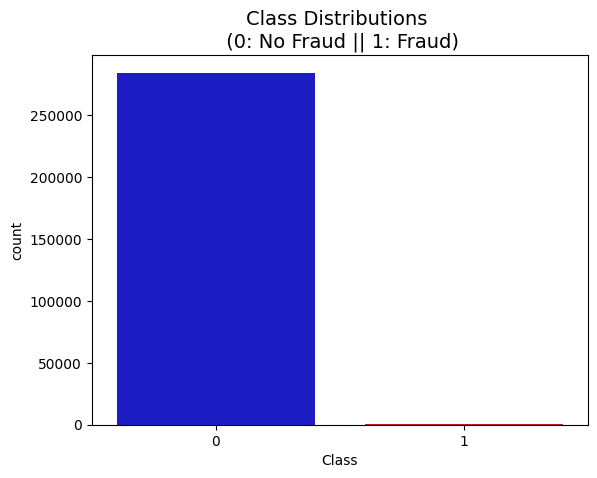

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', hue='Class', data=df, palette=colors, legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

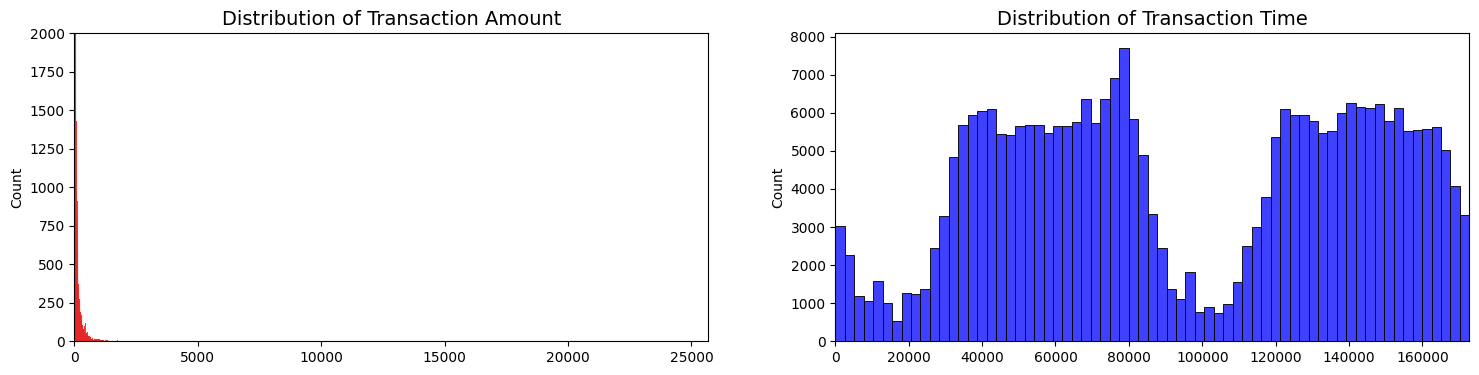

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_ylim(0,2000)

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


We scaled the Time and Amount columns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Preparing dataset for machine learning by splitting it into training and testing sets while preserving the class distribution

In [7]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
98630,10.528890,-0.210928,-0.328222,-2.349003,0.232363,1.739966,-1.255946,0.556480,0.453263,-0.046355,...,1.486020,0.600246,0.101581,-0.715774,-0.220348,0.064594,-0.380505,-0.059836,0.169744,0
79525,-0.293440,-0.312880,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1
46600,2.459303,-0.491547,1.140150,-1.632107,0.621814,-1.169492,-1.981624,-0.726020,-0.973711,-0.216556,...,0.090257,0.057594,0.182605,-0.169645,0.413116,0.288897,-0.125197,0.019966,0.060761,0
541,-0.307413,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
14104,-0.263816,-0.700161,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,...,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,1


Here, we balance the dataset by selecting all 492 fraud cases and randomly under-sampling the non-fraud cases to also include only 492, creating a 50/50 class split. then we shuffle this new balanced dataset to prepare it for training, reducing bias from the original order.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


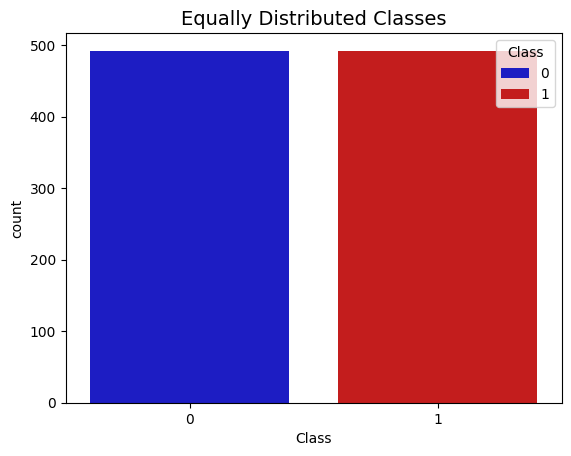

In [10]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', hue='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

New balanced dataset

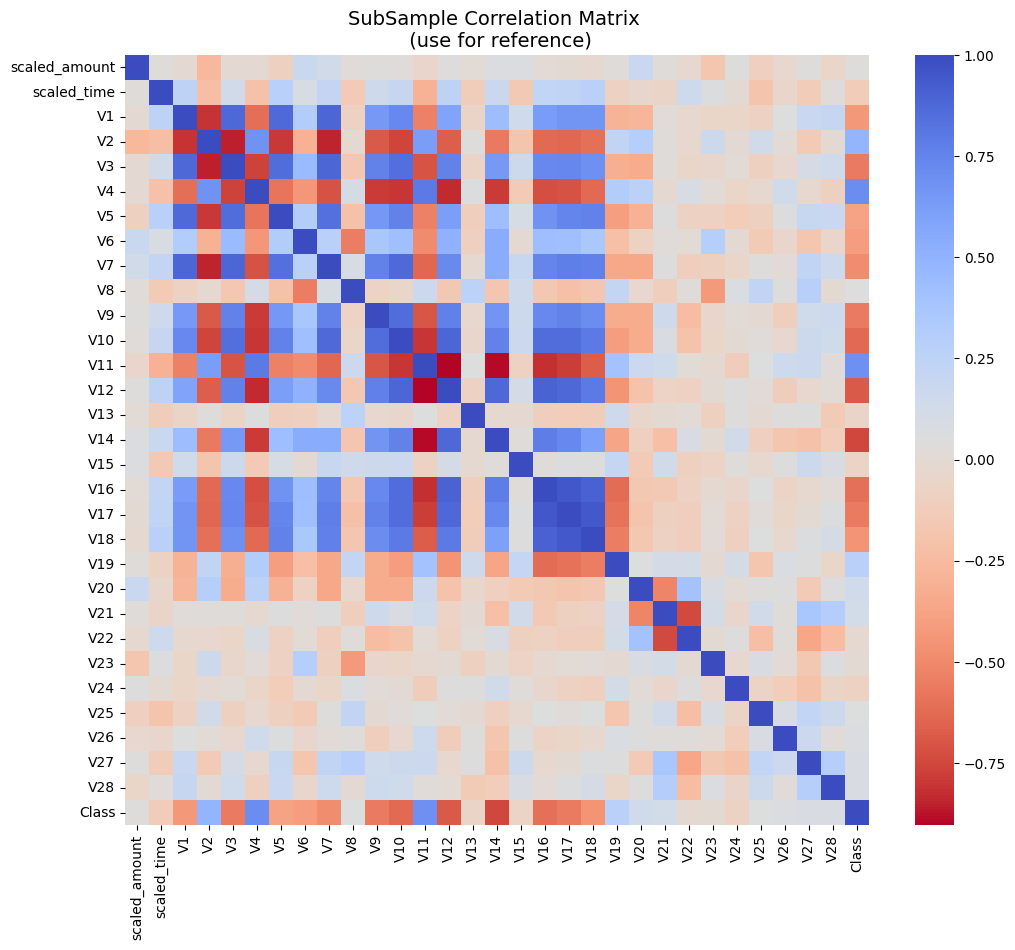

In [14]:
plt.figure(figsize=(12,10))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 16})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Observations from heat map of the correlation matrix:

1. Negative correlations: V10, V12, V14, and V17 are all negatively correlated. The cells that correspond to the intersection of "Class" with these variables are red. This indicates that the lower these values are, the more likely the end result will be a fraud transaction.

2. Positive correlations: V2, V4, V11, and V19 are all positively correlated. The cells that correspond to the intersection of "Class" with these variables are blue. This indicates that the higher these values are, the more likely the end result will be a fraud transaction.